# Canvas Overview

The drawing context

In [1]:
import skia
from IPython.display import display, Image

The following is a helper util that takes drawing function and renders the result.

In [2]:
def show(draw):
    surface = skia.Surface(256, 256)
    draw(surface.getCanvas())
    image = surface.makeImageSnapshot()
    display(Image(data=image.encodeToData()))

## Preview
Here is an example of a set of drawing commands to draw a filled heptagram.

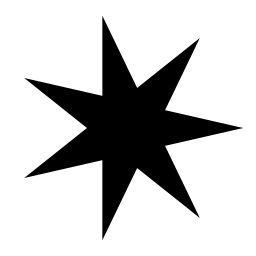

In [3]:
def draw(canvas):
    from math import cos, sin
    scale = 256.
    R = 0.45 * scale
    TAU = 6.2831853

    path = skia.Path()
    path.moveTo(R, 0.)
    for i in range(7):
        theta = 3 * i * TAU / 7
        path.lineTo(R * cos(theta), R * sin(theta))
    path.close()

    paint = skia.Paint()
    paint.setAntiAlias(True)

    canvas.clear(0xFFFFFFFF)
    canvas.translate(0.5 * scale, 0.5 * scale)
    canvas.drawPath(path, paint)
    
show(draw)

## Details

`Canvas` is the drawing context for Skia. It knows where to direct the drawing (i.e. where the screen of offscreen pixels are), and maintains a stack of matrices and clips. Note however, that unlike similar contexts in other APIs like postscript, cairo, or awt, Skia does not store any other drawing attributes in the context (e.g. color, pen size). Rather, these are specified explicitly in each draw call, via a `Paint`.

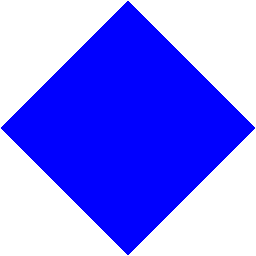

In [4]:
def draw(canvas):
    canvas.save()
    canvas.translate(128., 128.)
    canvas.rotate(45.)
    rect = skia.Rect.MakeXYWH(-90.5, -90.5, 181.0, 181.0)
    paint = skia.Paint()
    paint.setColor(skia.ColorBLUE)
    canvas.drawRect(rect, paint)
    canvas.restore()
    
show(draw)

The code above will draw a rectangle rotated by 45 degrees. Exactly what color and style the rect will be drawn in is described by the paint, not the canvas.

Check out more detailed info on creating a `Canvas` object in [Canvas-Creation.ipynb](Canvas-Creation.ipynb).

To begin with, we might want to erase the entire canvas. We can do this by drawing an enormous rectangle, but there are easier ways to do it.

```python
def draw(canvas):
    paint = skia.Paint()
    paint.setColor(skia.ColorWHITE)
    canvas.drawPaint(paint)
```

This fills the entire canvas (though respecting the current clip of course) with whatever color or shader (and xfermode) is specified by the paint. If there is a shader in the paint, then it will respect the current matrix on the canvas as well (see `Shader`). If you just want to draw a color (with an optional xfermode), you can just call drawColor(), and save yourself having to allocate a paint.

```python
def draw(canvas):
    canvas.drawColor(skia.ColorWHITE)
```

All of the other draw APIs are similar, each one ending with a paint parameter.

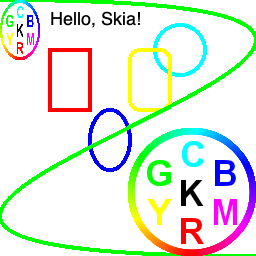

In [5]:
def draw(canvas):
    canvas.drawColor(skia.ColorWHITE)
    
    paint = skia.Paint()
    paint.setStyle(skia.Paint.kStroke)
    paint.setStrokeWidth(4)
    paint.setColor(skia.ColorRED)
    
    rect = skia.Rect.MakeXYWH(50, 50, 40, 60)
    canvas.drawRect(rect, paint)
    
    oval = skia.RRect()
    oval.setOval(rect)
    oval.offset(40, 60)
    paint.setColor(skia.ColorBLUE)
    canvas.drawRRect(oval, paint)
    
    paint.setColor(skia.ColorCYAN)
    canvas.drawCircle(180, 50, 25, paint)
    
    rect.offset(80, 0)
    paint.setColor(skia.ColorYELLOW)
    canvas.drawRoundRect(rect, 10, 10, paint)
    
    path = skia.Path()
    path.cubicTo(768, 0, -512, 256, 256, 256)
    paint.setColor(skia.ColorGREEN)
    canvas.drawPath(path, paint)
    
    image = skia.Image.MakeFromEncoded(
        skia.Data.MakeFromFileName('../skia/resources/images/color_wheel.png'))
    canvas.drawImage(image, 128, 128, paint)

    rect2 = skia.Rect.MakeXYWH(0, 0, 40, 60)
    canvas.drawImageRect(image, rect2, paint)
    
    paint2 = skia.Paint()
    text = skia.TextBlob.MakeFromString('Hello, Skia!', skia.Font(None, 18))
    canvas.drawTextBlob(text, 50, 25, paint2)
    
show(draw)